## In this assignment students have to transform iris data into 3 dimensionsand plot a 3d chart with transformed dimensions and colour each datapoint with specific class.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
data=datasets.load_iris()
type(data)

sklearn.utils.Bunch

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df=pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler=MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [8]:
scaled_data=scaler.transform(df)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA(n_components=3)

In [11]:
x_pca=pca.fit_transform(scaled_data)

In [12]:
x_pca.shape, scaled_data.shape

((150, 3), (150, 4))

In [13]:
finaldf=pd.DataFrame(x_pca, columns=['PC1','PC2','PC3'])
finaldf.head()

,PC1,PC2,PC3
0,-0.630703,0.107578,-0.018719
1,-0.622905,-0.104260,-0.049142
2,-0.669520,-0.051417,0.019644
3,-0.654153,-0.102885,0.023219
4,-0.648788,0.133488,0.015116


In [15]:
x=x_pca[:,0]
y=x_pca[:,1]
z=x_pca[:,2]

In [16]:
t=data['target']
x.shape,y.shape,z.shape,t.shape 

((150,), (150,), (150,), (150,))

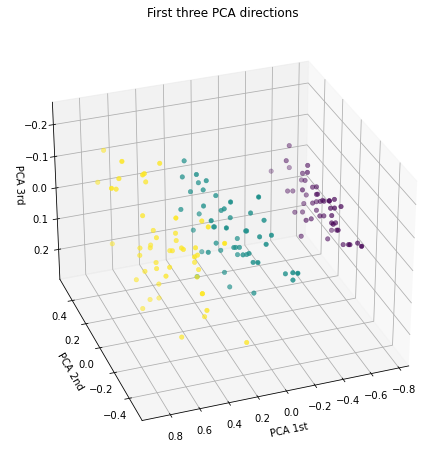

In [17]:
fig = plt.figure(1, figsize=(8, 6)) 
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x, y, z, c=t, cmap='viridis', linewidth=0.5);
ax.set_title("First three PCA directions") 
ax.set_xlabel("PCA 1st") 
ax.set_ylabel("PCA 2nd") 
ax.set_zlabel("PCA 3rd")

plt.show()